In [14]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio
import scipy
import librosa.display

In [114]:
utter, sr = librosa.load(librosa.util.example_audio_file())
print(type(utter), type(sr))

<class 'numpy.ndarray'> <class 'int'>


In [117]:
print(utter.shape)
print(sr)

noise = np.random.randn(len(utter))
utter_noise = utter + 0.005 * noise

(1355168,)
22050


In [118]:
Audio(data=utter_noise, rate=sr)

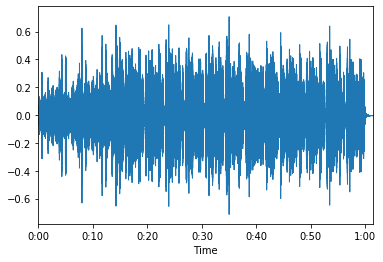

In [119]:
librosa.display.waveplot(utter, sr)

In [21]:
D = librosa.stft(utter)
print(D.shape)
print(type(D))

(1025, 2647)
<class 'numpy.ndarray'>


In [18]:
intervals = librosa.effects.split(utter, top_db=1000)

In [19]:
print(len(utter))
print(sr)
print(len(intervals))
print(intervals)
Audio(data = utter[intervals[0][0]:intervals[0][1]], rate = sr)

1355168
22050
1
[[      0 1355168]]


In [27]:
x = np.random.randn(3, 4)
y = np.zeros((1, 4))
np.concatenate((x, y), axis=0)

array([[-0.77747241,  2.53161243, -1.11557034,  1.01772353],
       [-1.28448142,  0.3919034 ,  1.00444678,  0.03671179],
       [-0.20218062,  1.45713209,  0.59829728, -0.24578983],
       [ 0.        ,  0.        ,  0.        ,  0.        ]])

# reset audio to 80 frames

In [41]:
import os
import wave
with wave.open("0287cc05-018c-4a2e-a92d-afd9dd26d8d9.wav", "rb") as wave_file:
    frame_rate = wave_file.getframerate()
    frames = wave_file.getnframes()
    duration = frames / frame_rate
print(frame_rate)
print(frames)
print(duration)

16000
22291
1.3931875


In [111]:
utter, sr = librosa.core.load("./SA1.wav", 16000)
utter_trim, index = librosa.effects.trim(utter, top_db=30)
print(len(utter_trim))
print(index)
duration = len(utter_trim) / sr
utter_strech = librosa.effects.time_stretch(utter_trim,rate = duration/0.815)
D = librosa.stft(utter_strech, n_fft=512, hop_length=int(sr*0.01), win_length=int(0.025*sr))
print(D.shape)

52736
[ 2048 54784]
(257, 82)


In [95]:
Audio(data=utter_trim[index[0]:index[1]], rate=sr)